In [1]:
# import the things we need first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import graphviz
from graphviz import Source
from sklearn.tree.export import export_text
from datetime import datetime

# Prepare DataSet 

In [2]:
df = pd.read_csv("Loan payments data.csv")
df['pressure']=df.Principal/df.terms
df_change1 = df

#encoding loan_status
df_change1.loc[df['loan_status']== "PAIDOFF", 'loan_status'] = 0 
df_change1.loc[(df['loan_status'] == "COLLECTION"), 'loan_status'] = 1 
df_change1.loc[df['loan_status'] == "COLLECTION_PAIDOFF", 'loan_status'] = 2 

#encoding education
df_change1.loc[df['education']== "High School or Below", 'education'] = 0 
df_change1.loc[df['education'] == "college", 'education'] = 1 
df_change1.loc[df['education'] == "Bechalor", 'education'] = 2 
df_change1.loc[df['education'] == "Master or Above", 'education'] = 3

#encoding gender
df_change1.loc[df['Gender']== "male", 'Gender'] = 0 
df_change1.loc[(df['Gender'] == "female"), 'Gender'] = 1


# Performing Decision Tree on Unbalancing Dataset

Unbalancing Dataset_500x12

In [3]:
df_change1

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,pressure
0,xqd20166231,0,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,0,0,33.333333
1,xqd20168902,0,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,2,1,33.333333
2,xqd20160003,0,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,2,1,33.333333
3,xqd20160004,0,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,1,0,66.666667
4,xqd20160005,0,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,1,1,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,2,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,0,0,33.333333
496,xqd20160497,2,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,0,0,66.666667
497,xqd20160498,2,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,1,0,53.333333
498,xqd20160499,2,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,1,1,33.333333


# Finding Correlated features on Dataset using pearson corr

In [4]:
#df_change1.loc[df['loan_status']== "PAIDOFF", 'loan_status'] = 0 
#[df_change1["loan_status"]==0].unique()
#loan_sum=df_change1.groupby('loan_status').sum()
#loan_count=df_change1.groupby('loan_status').nunique("age","education","Gender","pressure","Principal","terms")
#print(df_change1.describe())
#df_modi=df_change1.drop('past_due_days', )
loan_count=df_change1.groupby('loan_status').nunique()
print(loan_count)
corrmat=df_change1.corr(method='pearson')

             Loan_ID  loan_status  Principal  terms  effective_date  due_date  \
loan_status                                                                     
0                300            1          6      3               7        23   
1                100            1          2      2               4        11   
2                100            1          3      3               4        13   

             paid_off_time  past_due_days  age  education  Gender  pressure  
loan_status                                                                  
0                      220              0   31          4       2        11  
1                        0             11   27          4       2         4  
2                      100             25   25          3       2         4  


# Heatmap View to find realated features

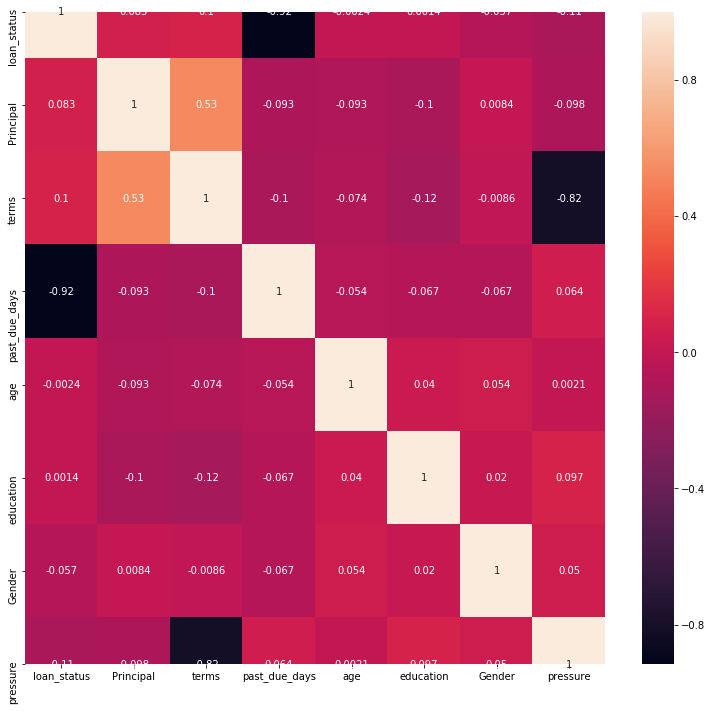

In [5]:
fig, ax = plt.subplots(figsize = (13,12))
sns.heatmap(corrmat, annot=True, annot_kws={'size':10})
#sns.heatmap(corrmat, xticklabels=True, yticklabels=True)

# Use Correlation Method to select the features 

In [6]:
df_change1.corr()

,loan_status,Principal,terms,past_due_days,age,education,Gender,pressure
loan_status,1.000000,0.083388,0.100662,-0.916153,-0.002385,0.001397,-0.056795,-0.107613
Principal,0.083388,1.000000,0.534302,-0.093139,-0.092613,-0.104652,0.008355,-0.098344
terms,0.100662,0.534302,1.000000,-0.102613,-0.074259,-0.123988,-0.008630,-0.817709
past_due_days,-0.916153,-0.093139,-0.102613,1.000000,-0.053849,-0.067452,-0.066801,0.063735
age,-0.002385,-0.092613,-0.074259,-0.053849,1.000000,0.039788,0.053843,0.002056
education,0.001397,-0.104652,-0.123988,-0.067452,0.039788,1.000000,0.020409,0.097090
Gender,-0.056795,0.008355,-0.008630,-0.066801,0.053843,0.020409,1.000000,0.050399
pressure,-0.107613,-0.098344,-0.817709,0.063735,0.002056,0.097090,0.050399,1.000000


# Build the Decision Tree Model_500x6

In [7]:
feature_cols=["age","education","Gender","pressure","Principal","terms"]
target=df_change1["loan_status"]
X=df_change1[feature_cols]
y=target
print("Start time is:\n{0}".format(datetime.now().time()))
#print("End time is:\n{0}".format(datetime.now().time()))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)
df_change1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1)
df_change1.fit(X_train,y_train)
y_pred = df_change1.predict(X_test) # let the model predict the test data
accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("End time is:\n{0}".format(datetime.now().time()))

Start time is:
14:27:13.568037
Accuracy: 0.536
End time is:
14:27:13.583665


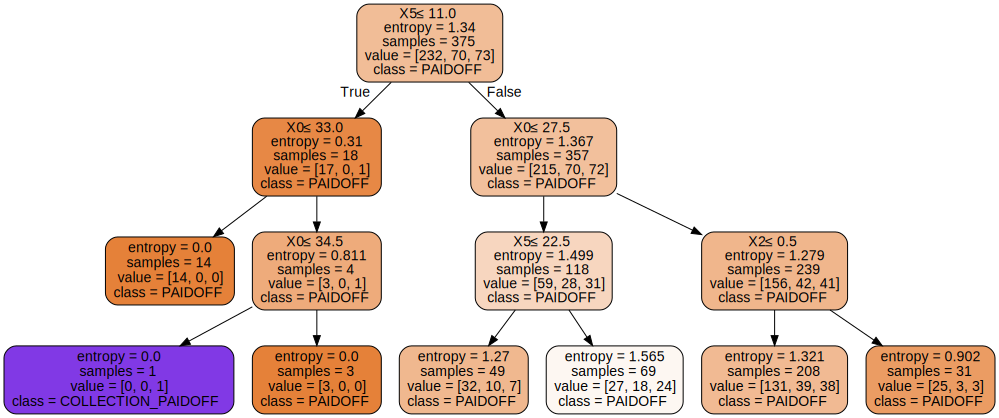

In [8]:
graph=Source(tree.export_graphviz(df_change1, out_file=None, class_names=['PAIDOFF','COLLECTION','COLLECTION_PAIDOFF'], label='all', filled=True, rounded=True,special_characters=True)) # display the tree, with no output file
#Source(tree.export_graphviz(df_change1, out_file=None, class_names=sorted(y.unique()), label='all', rounded=True, filled= True))
graph

# Confusion_Matrix for Decision Tree_500x6

In [9]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[67  0  1]
 [30  0  0]
 [27  0  0]]


0.536

# Performing KFold with DecisionTreeClassifier

In [10]:
k_fold= KFold(n_splits=10, shuffle=True, random_state=42)
df_change1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
scoring = 'accuracy'
print(X.shape)
#score = cross_val_score(df_change, np.transpose(X_train), np.transpose(target), cv=k_fold, n_jobs=1, scoring=scoring, error_score=np.nan)
score = cross_val_score(df_change1, X, target, cv=k_fold, n_jobs=1, scoring=scoring, error_score=np.nan)
print(score)
print(round(np.mean(score)*100, 2))

(500, 6)
[0.5  0.54 0.7  0.62 0.64 0.52 0.66 0.66 0.5  0.6 ]
59.4


# Performing PCA Before Decision Tree

In [11]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

print(X.shape)
for i in range(1,9):
    sum = 0
    d_tree = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    for j in range(0,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = j)
        d_tree.fit(X_train, y_train)
        y_predict = d_tree.predict(X_test)
        #Source(tree.export_graphviz(d_tree, out_file=None, class_names=True))
        sum = sum+accuracy_score(y_test, y_predict)
        if(accuracy_score(y_test, y_pred) > 0.4):
            print(f'{j} : {accuracy_score(y_test, y_pred)*100}')
    #print(i)
    #print(sum/100)
    

(500, 6)
0 : 59.199999999999996
1 : 51.2
2 : 57.599999999999994
3 : 65.60000000000001
4 : 64.8
5 : 58.4
6 : 60.8
7 : 58.4
8 : 64.8
9 : 67.2
10 : 60.8
11 : 57.599999999999994
12 : 57.599999999999994
13 : 59.199999999999996
14 : 56.8
15 : 61.6
16 : 60.0
17 : 57.599999999999994
18 : 62.4
19 : 67.2
20 : 53.6
21 : 63.2
22 : 56.8
23 : 56.00000000000001
24 : 59.199999999999996
25 : 55.2
26 : 68.0
27 : 56.8
28 : 65.60000000000001
29 : 64.0
30 : 63.2
31 : 60.0
32 : 56.00000000000001
33 : 55.2
34 : 57.599999999999994
35 : 67.2
36 : 64.0
37 : 59.199999999999996
38 : 61.6
39 : 58.4
40 : 53.6
41 : 58.4
42 : 53.6
43 : 56.00000000000001
44 : 64.0
45 : 61.6
46 : 62.4
47 : 54.400000000000006
48 : 55.2
49 : 58.4
50 : 60.0
51 : 55.2
52 : 59.199999999999996
53 : 55.2
54 : 58.4
55 : 64.0
56 : 58.4
57 : 59.199999999999996
58 : 59.199999999999996
59 : 63.2
60 : 56.8
61 : 50.4
62 : 57.599999999999994
63 : 59.199999999999996
64 : 58.4
65 : 62.4
66 : 61.6
67 : 52.0
68 : 60.0
69 : 63.2
70 : 60.0
71 : 58.4
72 : 5

In [12]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[80  0  1]
 [22  0  0]
 [22  0  0]]


0.64

# Perform MinMax scale then Decision Tree_500x6

In [13]:
# MinMax scale the data so that it fits nicely onto the 0.0->1.0 axes of the plot.
print(X.shape)
from sklearn import preprocessing
X_plot = preprocessing.MinMaxScaler().fit_transform(X)
print(X_plot.shape)

print(X_plot)

(500, 6)
(500, 6)
[[0.81818182 0.         0.         0.05737705 1.         1.        ]
 [0.96969697 0.66666667 1.         0.05737705 1.         1.        ]
 [0.45454545 0.66666667 1.         0.05737705 1.         1.        ]
 ...
 [0.36363636 0.33333333 0.         0.2295082  0.71428571 0.34782609]
 [0.60606061 0.33333333 1.         0.05737705 1.         1.        ]
 [0.3030303  0.         0.         0.05737705 1.         1.        ]]


In [14]:
print(df)

scaler = MinMaxScaler()
#scaler = StandareScaler()
df_minmax = df
x = df_minmax[["Principal"]].values
x_scaled = scaler.fit_transform(x)
df_minmax["Principal"] = x_scaled

x = df[["terms"]].values
x_scaled = scaler.fit_transform(x)
df_minmax["terms"] = x_scaled

x = df_minmax[["age"]].values
x_scaled = scaler.fit_transform(x)
df_minmax["age"] = x_scaled

x = df_minmax[["pressure"]].values
x_scaled = scaler.fit_transform(x)
df_minmax["pressure"] = x_scaled

df_minmax

         Loan_ID  loan_status  Principal  terms effective_date    due_date  \
0    xqd20166231            0       1000     30       9/8/2016   10/7/2016   
1    xqd20168902            0       1000     30       9/8/2016   10/7/2016   
2    xqd20160003            0       1000     30       9/8/2016   10/7/2016   
3    xqd20160004            0       1000     15       9/8/2016   9/22/2016   
4    xqd20160005            0       1000     30       9/9/2016   10/8/2016   
..           ...          ...        ...    ...            ...         ...   
495  xqd20160496            2       1000     30      9/12/2016  10/11/2016   
496  xqd20160497            2       1000     15      9/12/2016   9/26/2016   
497  xqd20160498            2        800     15      9/12/2016   9/26/2016   
498  xqd20160499            2       1000     30      9/12/2016  11/10/2016   
499  xqd20160500            2       1000     30      9/12/2016  10/11/2016   

        paid_off_time  past_due_days  age  education  Gender   

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,pressure
0,xqd20166231,0,1.000000,1.000000,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,0.818182,0,0,0.057377
1,xqd20168902,0,1.000000,1.000000,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,0.969697,2,1,0.057377
2,xqd20160003,0,1.000000,1.000000,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,0.454545,2,1,0.057377
3,xqd20160004,0,1.000000,0.347826,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,0.272727,1,0,0.344262
4,xqd20160005,0,1.000000,1.000000,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,0.303030,1,1,0.057377
...,...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,2,1.000000,1.000000,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,0.303030,0,0,0.057377
496,xqd20160497,2,1.000000,0.347826,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,0.242424,0,0,0.344262
497,xqd20160498,2,0.714286,0.347826,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,0.363636,1,0,0.229508
498,xqd20160499,2,1.000000,1.000000,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,0.606061,1,1,0.057377


In [15]:
X = df_minmax[["age","education","Gender","pressure","Principal","terms"]]
y = df_minmax["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)
df_minmax = DecisionTreeClassifier(criterion='entropy', max_depth=3)
df_minmax.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[67  0  1]
 [30  0  0]
 [27  0  0]]


0.536

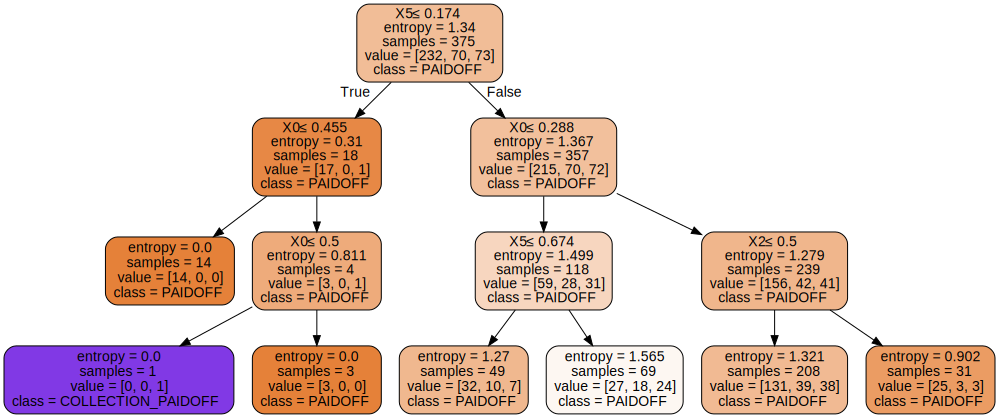

In [17]:
Source(tree.export_graphviz(df_minmax, out_file=None, class_names=['PAIDOFF','COLLECTION','COLLECTION_PAIDOFF'], label='all', filled=True, rounded=True,special_characters=True))

# Prepare DataSet to solve the unbalancing_900x12

By Predicting Loan_Status,

loan_status Classes
PAIDOFF=0
COLLECTION=1
COLLECTION_PAIDOFF=2

original Dataset is df_change1(300x12)
Modified Dataset is df_final(900x12)

In [18]:
df = pd.read_csv("loan_payments_data.csv")
df['pressure']=df.Principal/df.terms
df_change1 = df

#encoding loan_status
df_change1.loc[df['loan_status']== "PAIDOFF", 'loan_status'] = 0 
df_change1.loc[(df['loan_status'] == "COLLECTION"), 'loan_status'] = 1 
df_change1.loc[df['loan_status'] == "COLLECTION_PAIDOFF", 'loan_status'] = 2 

#encoding education
df_change1.loc[df['education']== "High School or Below", 'education'] = 0 
df_change1.loc[df['education'] == "college", 'education'] = 1 
df_change1.loc[df['education'] == "Bechalor", 'education'] = 2 
df_change1.loc[df['education'] == "Master or Above", 'education'] = 3

#encoding gender
df_change1.loc[df['Gender']== "male", 'Gender'] = 0 
df_change1.loc[(df['Gender'] == "female"), 'Gender'] = 1
#getting all the 3 different data
df_set1 = df_change1[(df_change1.index<=99) | (df_change1.index>=300)]
df_set2 = df_change1[((df_change1.index>=100) &(df_change1.index <= 199)) | (df_change1.index>=300)]
df_set3 = df_change1[((df_change1.index>=200) &(df_change1.index <= 299)) | (df_change1.index>=300)]
#combining all 3 sets to make a 900 samples dataset to ensure equal weightage given to all category
df_med = df_set1.append(df_set2)
df_final = df_med.append(df_set3)
df_final

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,pressure
0,xqd20166231,0,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,0,0,33.333333
1,xqd20168902,0,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,2,1,33.333333
2,xqd20160003,0,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,2,1,33.333333
3,xqd20160004,0,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,1,0,66.666667
4,xqd20160005,0,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,1,1,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,2,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,0,0,33.333333
496,xqd20160497,2,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,0,0,66.666667
497,xqd20160498,2,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,1,0,53.333333
498,xqd20160499,2,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,1,1,33.333333


             Loan_ID  loan_status  Principal  terms  effective_date  due_date  \
loan_status                                                                     
0                300            1          6      3               7        23   
1                100            1          2      2               4        11   
2                100            1          3      3               4        13   

             paid_off_time  past_due_days  age  education  Gender  pressure  
loan_status                                                                  
0                      220              0   31          4       2        11  
1                        0             11   27          4       2         4  
2                      100             25   25          3       2         4  


(8.0, 0.0)

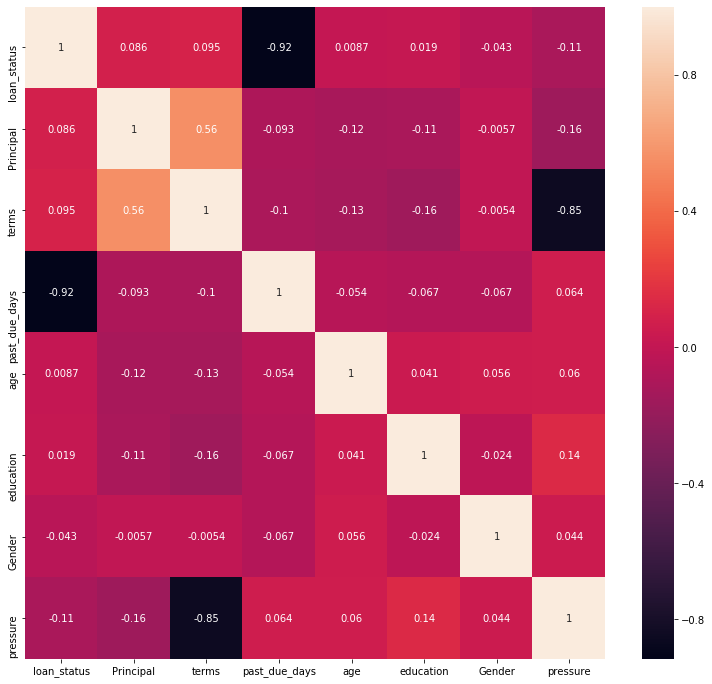

In [19]:
#df_final
df_final.corr()
loan_count=df_final.groupby('loan_status').nunique()
print(loan_count)
corrmat=df_final.corr(method='pearson')
fig, ax = plt.subplots(figsize = (13,12))
sns.heatmap(corrmat, annot=True, annot_kws={'size':10})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


# Apply Decision Tree Classifier only, default criterion='gini', best Accuracy= 42.22% at RandomState=38

In [20]:
feature_cols=["age","education","Gender","pressure","Principal","terms"]
target=df_final["loan_status"]
X=df_final[feature_cols]
y=target
print("Start time is:\n{0}".format(datetime.now().time()))
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =i)
    df_final_check = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1)
    df_final_check.fit(X_train,y_train)
    y_pred = df_final_check.predict(X_test) # let the model predict the test data
    if(accuracy_score(y_test, y_pred) > 0.4):
        print(f'{i} : {accuracy_score(y_test, y_pred)*100}')
    #print(i)
    #print(accuracy_score(y_test, y_pred)*100) 
    
print("End time is:\n{0}".format(datetime.now().time())) #42,72=38.66

Start time is:
14:27:18.194625
38 : 41.77777777777778
64 : 41.333333333333336
65 : 40.88888888888889
93 : 40.44444444444444
End time is:
14:27:18.553825


# Apply Decision Tree Classifier only, criterion='entropy' ,best Accuracy= 41.77% at RandomState=64

In [21]:
feature_cols=["age","education","Gender","pressure","Principal","terms"]
target=df_final["loan_status"]
X=df_final[feature_cols]
y=target
print("Start time is:\n{0}".format(datetime.now().time()))
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =i)
    df_final_check = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1)
    df_final_check.fit(X_train,y_train)
    y_pred = df_final_check.predict(X_test) # let the model predict the test data
    if(accuracy_score(y_test, y_pred) > 0.4):
        print(f'{i} : {accuracy_score(y_test, y_pred)*100}')
    #print(i)
    #print(accuracy_score(y_test, y_pred)*100) 
    
print("End time is:\n{0}".format(datetime.now().time()))

Start time is:
14:27:18.569456
16 : 40.88888888888889
60 : 40.44444444444444
64 : 41.333333333333336
93 : 40.44444444444444
End time is:
14:27:18.913123


# Apply Decision Tree Classifier only, best Accuracy= 41.33% at RandomState=64

In [22]:
feature_cols=["age","education","Gender","pressure","Principal","terms"]
target=df_final["loan_status"]
X=df_final[feature_cols]
y=target
print("Start time is:\n{0}".format(datetime.now().time()))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =64)
df_f = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1)
df_f.fit(X_train,y_train)
y_pred = df_f.predict(X_test) # let the model predict the test data
accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("End time is:\n{0}".format(datetime.now().time()))

Start time is:
14:27:18.928778
Accuracy: 0.41333333333333333
End time is:
14:27:18.944355


In [23]:
y_predict = df_f.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 5 27 37]
 [ 1 39 39]
 [ 0 28 49]]


0.41333333333333333

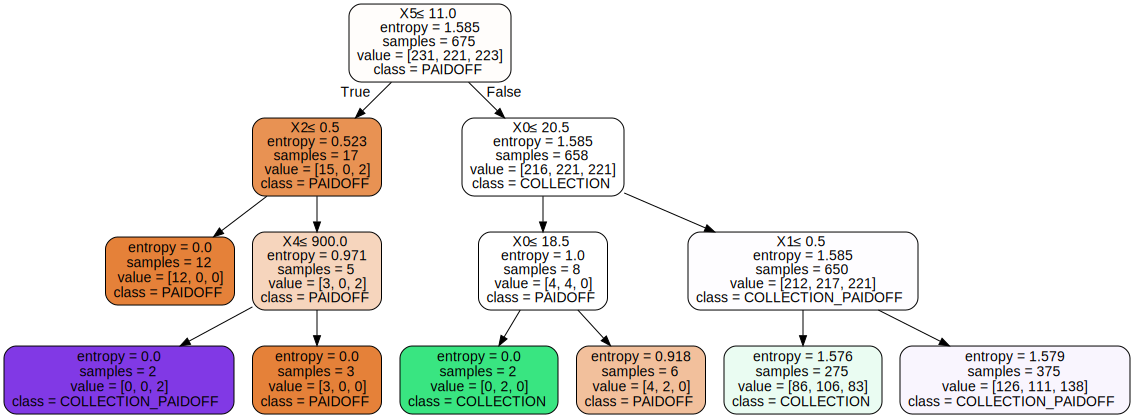

In [24]:
graph=Source(tree.export_graphviz(df_f, out_file=None, class_names=['PAIDOFF','COLLECTION','COLLECTION_PAIDOFF'], label='all', filled=True, rounded=True,special_characters=True)) # display the tree, with no output file
#Source(tree.export_graphviz(df_change1, out_file=None, class_names=sorted(y.unique()), label='all', rounded=True, filled= True))
graph

# Perform KFold on DecisionTreeClassifier

In [25]:
print("Start time is:\n{0}".format(datetime.now().time()))
for i in range(1,100):
    k_fold = KFold(n_splits=10, shuffle=True, random_state=i)
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
    scoring = 'accuracy'
    score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
    print(i)
    print(round(np.mean(score)*100, 2)) 
    
print("End time is:\n{0}".format(datetime.now().time()))

Start time is:
14:27:19.084947
1
35.0
2
34.0
3
34.0
4
36.44
5
33.11
6
36.33
7
35.33
8
36.78
9
34.78
10
35.0
11
35.44
12
34.22
13
38.0
14
33.56
15
35.11
16
32.11
17
34.67
18
33.89
19
34.44
20
36.11
21
33.0
22
34.33
23
35.67
24
33.78
25
33.78
26
33.11
27
35.89
28
36.44
29
34.0
30
34.67
31
35.33
32
33.56
33
35.33
34
35.67
35
34.11
36
36.22
37
36.67
38
35.22
39
36.44
40
36.56
41
35.0
42
35.11
43
35.33
44
36.33
45
33.0
46
37.44
47
34.89
48
36.22
49
31.89
50
36.44
51
33.78
52
36.11
53
34.67
54
36.33
55
36.11
56
35.11
57
37.22
58
33.56
59
33.67
60
32.22
61
35.33
62
35.67
63
35.67
64
35.22
65
34.67
66
34.33
67
37.44
68
32.78
69
35.56
70
32.44
71
34.22
72
36.89
73
33.78
74
35.33
75
37.44
76
34.89
77
35.0
78
36.44
79
35.22
80
34.0
81
33.78
82
34.56
83
36.11
84
34.78
85
36.0
86
35.44
87
36.0
88
34.33
89
33.11
90
34.0
91
35.67
92
34.56
93
35.0
94
35.44
95
35.78
96
34.44
97
35.22
98
34.44
99
33.89
End time is:
14:27:22.664815


# Perform KFold on DecisionTreeClassifier randomstate=75,accuracy=37.56%

In [47]:
feature_cols=["age","education","Gender","pressure","Principal","terms"]
target=df_final["loan_status"]
X=df_final[feature_cols]
y=target
k_fold = KFold(n_splits=10, shuffle=True, random_state=75)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
print(round(np.mean(score)*100, 2)) 

37.56


# Calculate Confusion Matrix After KFold

In [48]:
feature_cols=["age","education","Gender","pressure","Principal","terms"]
target=df_final["loan_status"]
X=df_final[feature_cols]
y=target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =56)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 4 36 38]
 [ 1 26 43]
 [ 1 32 44]]


0.3288888888888889

# KFold with criterion='entropy'

In [49]:
feature_cols=["age","education","Gender","pressure","Principal","terms"]
target=df_final["loan_status"]
X=df_final[feature_cols]
y=target
k_fold = KFold(n_splits=10, shuffle=True, random_state=75)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
print(round(np.mean(score)*100, 2)) 
    

37.67


# KFold with criterion='gini'

In [50]:
feature_cols=["age","education","Gender","pressure","Principal","terms"]
target=df_final["loan_status"]
X=df_final[feature_cols]
y=target
k_fold = KFold(n_splits=10, shuffle=True, random_state=75)
clf = DecisionTreeClassifier(max_depth=3)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring,error_score=np.nan)
print(round(np.mean(score)*100, 2)) 

38.11


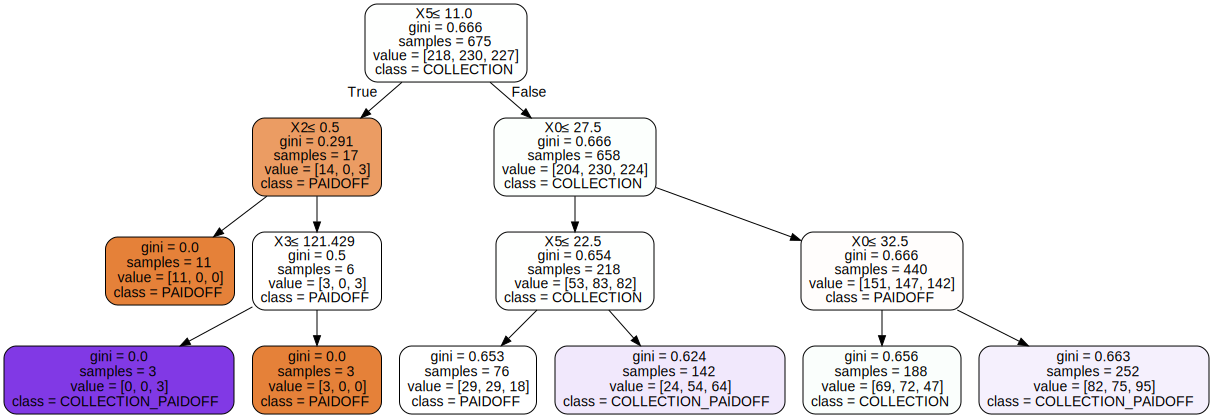

In [30]:
graph=Source(tree.export_graphviz(df_final, out_file=None, class_names=['PAIDOFF','COLLECTION','COLLECTION_PAIDOFF'], label='all', filled=True, rounded=True,special_characters=True)) # display the tree, with no output file
#Source(tree.export_graphviz(df_change1, out_file=None, class_names=sorted(y.unique()), label='all', rounded=True, filled= True))
graph

In [31]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 2 27 53]
 [ 2 34 34]
 [ 2 33 38]]


0.3288888888888889

# Performing KFold with DecisionTreeClassifier

In [32]:
k_fold= KFold(n_splits=10, shuffle=True, random_state=57)
df_final = DecisionTreeClassifier(criterion="entropy", max_depth=3)
scoring = 'accuracy'
print(X.shape)
#score = cross_val_score(df_change, np.transpose(X_train), np.transpose(target), cv=k_fold, n_jobs=1, scoring=scoring, error_score=np.nan)
score = cross_val_score(df_final, X, target, cv=k_fold, n_jobs=1, scoring=scoring, error_score=np.nan)
print(score)
print(round(np.mean(score)*100, 2))

(900, 6)
[0.38888889 0.37777778 0.35555556 0.36666667 0.37777778 0.41111111
 0.38888889 0.35555556 0.34444444 0.36666667]
37.33


# Performing PCA Before Decision Tree

In [33]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

print(X.shape)
#for i in range(1,9):
    
d_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
sum = 0
for j in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = j)
    d_tree.fit(X_train, y_train)
    y_predict = d_tree.predict(X_test)
        #Source(tree.export_graphviz(d_tree, out_file=None, class_names=True))
    sum = sum+accuracy_score(y_test, y_predict)
        #print('j')
        #print(j)
        #print('acc scroe')
    if(accuracy_score(y_test, y_pred) > 0.4):
        print(f'{j} : {accuracy_score(y_test, y_pred)*100}')
    #print(j) 
    #print(round(accuracy_score(y_test, y_predict)*100,2)) 
          
print(sum/100)

(900, 6)
12 : 40.44444444444444
64 : 41.333333333333336
0.3538222222222223


# For PCA, best accuray is 41.33% at RandomState=64

In [34]:
pca = PCA(n_components=2)
#pirnt(X.shape)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['loan_status']]], axis = 1)
print(X.shape)
d_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 64)
d_tree.fit(X_train, y_train)
y_predict = d_tree.predict(X_test)
accuracy_score(y_test, y_predict)

(900, 6)


0.41333333333333333

# Calculate Confusion Matrix for PCA

In [35]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 5 27 37]
 [ 1 39 39]
 [ 0 28 49]]


0.41333333333333333

# Scatter Plot for PCA

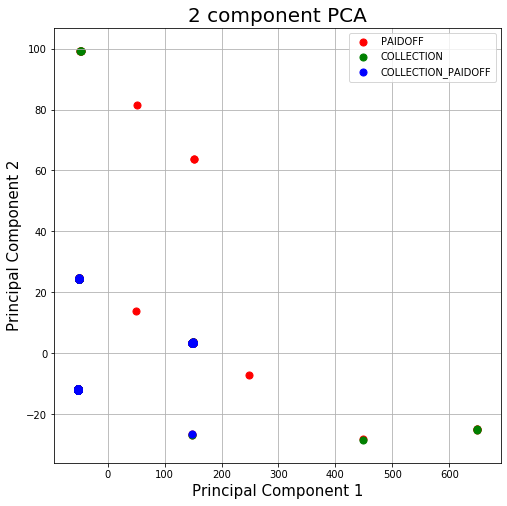

In [36]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targetd = ['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF']
targets = [0,1,2]
colors = ['r', 'g', 'b']
for t, color in zip(targets,colors):
    indicesToKeep = finalDf['loan_status'] == t
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep,'principal component 2'], c = color, s = 50)
ax.legend(targetd)
ax.grid()

# Decision Tree Graph for PCA

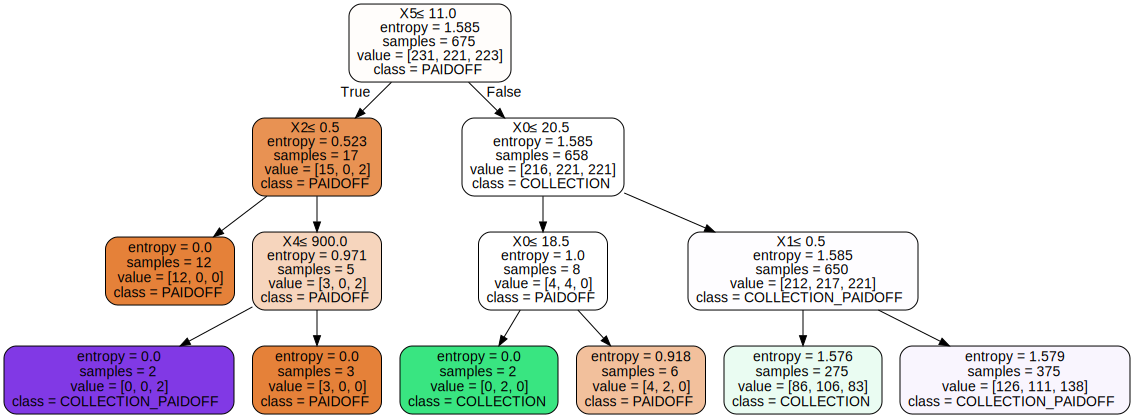

In [37]:
graph=Source(tree.export_graphviz(d_tree, out_file=None, class_names=['PAIDOFF','COLLECTION','COLLECTION_PAIDOFF'], label='all', filled=True, rounded=True,special_characters=True)) # display the tree, with no output file
#Source(tree.export_graphviz(df_change1, out_file=None, class_names=sorted(y.unique()), label='all', rounded=True, filled= True))
graph

# Perform MinMaxscaler then Decision Tree_900x6

In [38]:
df_change1 = df

#encoding loan_status
df_change1.loc[df['loan_status']== "PAIDOFF", 'loan_status'] = 0 
df_change1.loc[(df['loan_status'] == "COLLECTION"), 'loan_status'] = 1 
df_change1.loc[df['loan_status'] == "COLLECTION_PAIDOFF", 'loan_status'] = 2 

#encoding education
df_change1.loc[df['education']== "High School or Below", 'education'] = 0 
df_change1.loc[df['education'] == "college", 'education'] = 1 
df_change1.loc[df['education'] == "Bechalor", 'education'] = 2 
df_change1.loc[df['education'] == "Master or Above", 'education'] = 3

#encoding gender
df_change1.loc[df['Gender']== "male", 'Gender'] = 0 
df_change1.loc[(df['Gender'] == "female"), 'Gender'] = 1
#getting all the 3 different data
df_set1 = df_change1[(df_change1.index<=99) | (df_change1.index>=300)]
df_set2 = df_change1[((df_change1.index>=100) &(df_change1.index <= 199)) | (df_change1.index>=300)]
df_set3 = df_change1[((df_change1.index>=200) &(df_change1.index <= 299)) | (df_change1.index>=300)]
#combining all 3 sets to make a 900 samples dataset to ensure equal weightage given to all category
df_med = df_set1.append(df_set2)
df_final = df_med.append(df_set3)
df_final

D:\Anacoda3\envs\pythonEx\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,pressure
0,xqd20166231,0,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,0,0,33.333333
1,xqd20168902,0,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,2,1,33.333333
2,xqd20160003,0,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,2,1,33.333333
3,xqd20160004,0,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,1,0,66.666667
4,xqd20160005,0,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,1,1,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,2,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,0,0,33.333333
496,xqd20160497,2,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,0,0,66.666667
497,xqd20160498,2,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,1,0,53.333333
498,xqd20160499,2,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,1,1,33.333333


# Perform MinMaxscaler then Decision Tree_900x6

In [39]:
# MinMax scale the data so that it fits nicely onto the 0.0->1.0 axes of the plot.
from sklearn import preprocessing
X_plot = preprocessing.MinMaxScaler().fit_transform(X)
print(X_plot.shape)

print(X_plot)

(900, 6)
[[0.81818182 0.         0.         0.05737705 1.         1.        ]
 [0.96969697 0.66666667 1.         0.05737705 1.         1.        ]
 [0.45454545 0.66666667 1.         0.05737705 1.         1.        ]
 ...
 [0.36363636 0.33333333 0.         0.2295082  0.71428571 0.34782609]
 [0.60606061 0.33333333 1.         0.05737705 1.         1.        ]
 [0.3030303  0.         0.         0.05737705 1.         1.        ]]


In [40]:
print(df_final)

scaler = MinMaxScaler()
#scaler = StandareScaler()
df_minmax = df_final
x = df_minmax[["Principal"]].values
x_scaled = scaler.fit_transform(x)
df_minmax["Principal"] = x_scaled

#df_minmax['terms'] = df_minmax['terms'].astype(float)
#x = df[["terms"]].values
#x_scaled = scaler.fit_transform(x)
#df_minmax["terms"] = x_scaled
#print("terms")
#print(x_scaled.type)

x = df_minmax[["age"]].values
x_scaled = scaler.fit_transform(x)
df_minmax["age"] = x_scaled

x = df_minmax[["pressure"]].values
x_scaled = scaler.fit_transform(x)
df_minmax["pressure"] = x_scaled

df_minmax

         Loan_ID  loan_status  Principal  terms effective_date    due_date  \
0    xqd20166231            0       1000     30       9/8/2016   10/7/2016   
1    xqd20168902            0       1000     30       9/8/2016   10/7/2016   
2    xqd20160003            0       1000     30       9/8/2016   10/7/2016   
3    xqd20160004            0       1000     15       9/8/2016   9/22/2016   
4    xqd20160005            0       1000     30       9/9/2016   10/8/2016   
..           ...          ...        ...    ...            ...         ...   
495  xqd20160496            2       1000     30      9/12/2016  10/11/2016   
496  xqd20160497            2       1000     15      9/12/2016   9/26/2016   
497  xqd20160498            2        800     15      9/12/2016   9/26/2016   
498  xqd20160499            2       1000     30      9/12/2016  11/10/2016   
499  xqd20160500            2       1000     30      9/12/2016  10/11/2016   

        paid_off_time  past_due_days  age  education  Gender   

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,pressure
0,xqd20166231,0,1.000000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,0.818182,0,0,0.057377
1,xqd20168902,0,1.000000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,0.969697,2,1,0.057377
2,xqd20160003,0,1.000000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,0.454545,2,1,0.057377
3,xqd20160004,0,1.000000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,0.272727,1,0,0.344262
4,xqd20160005,0,1.000000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,0.303030,1,1,0.057377
...,...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,2,1.000000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,0.303030,0,0,0.057377
496,xqd20160497,2,1.000000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,0.242424,0,0,0.344262
497,xqd20160498,2,0.714286,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,0.363636,1,0,0.229508
498,xqd20160499,2,1.000000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,0.606061,1,1,0.057377


In [41]:
X = df_minmax[["age","education","Gender","pressure","Principal"]]
y = df_minmax["loan_status"]
for i in range(1,100):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =i)
    df_minmax1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1)
    df_minmax1.fit(X_train,y_train)
    y_predict = df_minmax1.predict(X_test)
        #Source(tree.export_graphviz(d_tree, out_file=None, class_names=True))
    sum = sum+accuracy_score(y_test, y_predict)
    print(i)
    print(round(accuracy_score(y_test, y_predict)*100,2)) #rnd_state=82>>accscore=0.44
          
print(sum/100)

1
34.22
2
37.78
3
37.78
4
37.33
5
35.56
6
31.56
7
36.0
8
33.78
9
34.67
10
38.67
11
32.44
12
33.33
13
34.67
14
37.78
15
33.33
16
38.22
17
33.33
18
32.0
19
31.56
20
38.22
21
32.0
22
37.78
23
36.89
24
33.78
25
34.22
26
31.11
27
28.44
28
30.22
29
37.78
30
35.56
31
34.22
32
30.22
33
35.56
34
34.67
35
32.44
36
35.56
37
32.44
38
32.44
39
40.44
40
32.0
41
32.0
42
34.22
43
32.44
44
34.22
45
35.11
46
32.89
47
36.0
48
32.0
49
36.0
50
32.89
51
33.33
52
32.89
53
34.22
54
30.22
55
37.78
56
37.78
57
34.22
58
36.0
59
33.78
60
32.0
61
33.33
62
29.78
63
37.33
64
36.44
65
32.0
66
36.44
67
34.67
68
36.0
69
35.56
70
35.56
71
35.11
72
33.78
73
37.33
74
30.22
75
33.33
76
31.56
77
36.89
78
32.0
79
37.33
80
38.67
81
29.78
82
39.11
83
35.56
84
36.0
85
38.22
86
37.33
87
31.56
88
32.0
89
28.44
90
38.67
91
33.78
92
36.44
93
28.44
94
37.78
95
34.22
96
35.56
97
32.0
98
34.67
99
36.0
0.6947111111111112


# Perform MinMaxscaler, the best accuracy=38.22% at randomstate=20

In [42]:
X = df_minmax[["age","education","Gender","pressure","Principal"]]
y = df_minmax["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =20)
df_minmax = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1)
df_minmax.fit(X_train,y_train)
y_predict = df_minmax.predict(X_test)
     
round(accuracy_score(y_test, y_predict)*100,2)

38.22

# Calculate Confusion Matrix After MinMaxscaler

In [43]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 3 31 47]
 [ 3 32 32]
 [ 0 31 46]]


0.36

# Decision Tree for MinMaxscaler

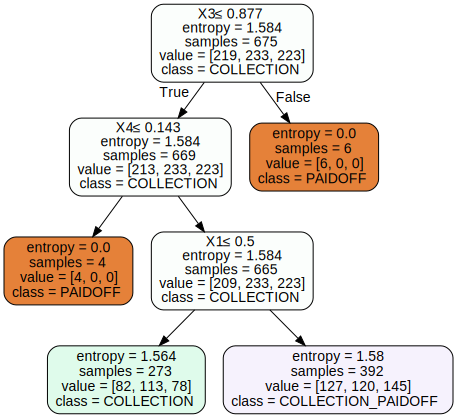

In [44]:
Source(tree.export_graphviz(df_minmax, out_file=None, class_names=['PAIDOFF','COLLECTION','COLLECTION_PAIDOFF'], label='all', filled=True, rounded=True,special_characters=True))

# Summary